<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/camila_fnirs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento Toque Mãe-Estranha, teste **d-Cohen**

O teste *d-Cohen*, ou medida de tamanho de efeito d, é uma estatística para quantificar a diferença entre as médias de dois grupos em termos de desvio padrão e empregado para avaliar a magnitude da diferença entre grupos. Seu valor varia de -1 a 1, onde valores positivos indicam que o grupo 1 tem uma média maior do que o grupo 2, e valores negativos indicam que o grupo 1 tem uma média menor do que o grupo 2. Um valor de 0 indica que não há diferença entre as médias dos dois grupos. Seu cálculo é feido do seguinte modo:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

Onde $\bar{x}_1$ e $\bar{x}_2$ são as médias dos dois grupos e $s$ é o desvio padrão agrupado, calculado como:

$$s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

O valor do d-Cohen pode ser interpretado da seguinte forma:

- 0,2: efeito pequeno
- 0,5: efeito médio
- 0,8: efeito grande  



# Configuração dos Blocos



# Imports

In [112]:
#@markdown imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.precision', 4)

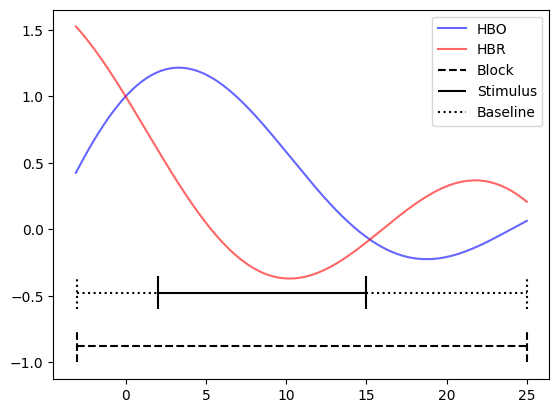

In [148]:
time = np.arange(-3.1,25.1,0.1)
hbo = np.sin(np.pi/24*time) + np.cos(np.pi/16*time)
hbr = np.cos(np.pi/32*time) - np.sin(np.pi/16*time)

plt.plot(time,hbo,'b',label='HBO',alpha=0.6)
plt.plot(time,hbr,'r',label='HBR',alpha=0.6)

level = 2
plt.vlines(-3, 1 - level, 1.25 - level, linestyle='dashed', color='k', label = 'Block')
plt.vlines(25, 1 - level, 1.25 - level, linestyle='dashed', color='k')
plt.hlines(1.125 - level, -3,  25, linestyle='dashed', color='k')

level = level - 0.4
plt.vlines(2, 1 - level, 1.25 - level, linestyle='solid', color='k', label = 'Stimulus')
plt.vlines(15, 1 - level, 1.25 - level, linestyle='solid', color='k')
plt.hlines(1.125 - level, 2,  15, linestyle='solid', color='k')

# level = level - 0.25
plt.vlines(-3, 1 - level, 1.25 - level, linestyle='dotted', color='k', label = 'Baseline')
plt.vlines(25, 1 - level, 1.25 - level, linestyle='dotted', color='k')
plt.hlines(1.125 - level, -3,  2, linestyle='dotted', color='k')
plt.hlines(1.125 - level, 15,  25, linestyle='dotted', color='k')

plt.legend()
plt.show()


# Connect to Google Drive

In [101]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/usr/lib/python3.10/threading.py:957: ResourceWarning: unclosed file <_io.FileIO name=48 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.10/threading.py:957: ResourceWarning: unclosed file <_io.FileIO name=50 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7ba6a75db940>


Mounted at /content/drive


# Data Gattering


In [103]:
df = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen.xlsx",sheet_name='d_Cohen_Mae_hbo')
df = df.melt(var_name='Channel', value_name='d_Cohen_Mae_hbo', value_vars=df.columns)

for sheet in ['d_Cohen_Mae_hbr','d_Cohen_Estranha_hbo','d_Cohen_Estranha_hbr']:
  temp = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen.xlsx",sheet_name=sheet)
  temp = temp.melt(var_name='Channel', value_name=sheet, value_vars=temp.columns)
  df = pd.concat([df,temp[[sheet]]],axis=1)

df.columns = ['Channel', 'Mother_HBO', 'Mother_HBR', 'Stranger_HBO',  'Stranger_HBR']
df.head()

,Channel,Mother_HBO,Mother_HBR,Stranger_HBO,Stranger_HBR
0,S1_D1 1,-2.7025,0.1462,-3.1184,-1.7284
1,S1_D3 2,-1.4837,-4.8217,-2.3021,-0.8606
2,S1_D4 3,-2.0762,5.1373,-0.9241,-0.1044
3,S1_D6 4,-0.2216,6.9048,-1.1282,2.7083
4,S2_D2 5,-1.8615,2.4789,-2.0067,-0.6548


In [104]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Mother_HBO,Mother_HBR,Stranger_HBO,Stranger_HBR
count,28.0000,28.0000,28.0000,28.0000
mean,-0.7680,0.0205,-1.9836,0.2709
std,2.7633,2.8823,2.8846,1.7601
min,-7.3321,-5.1278,-11.8936,-3.2997
25%,-2.1820,-1.6393,-3.1492,-1.0050
50%,-0.3951,-0.0086,-2.0328,0.3613
75%,1.1917,2.1531,-0.3510,1.7669
max,5.6971,6.9048,2.8680,3.3356


In [105]:
Mother_Actived = []
Stranger_Actived = []
Mother_Intensity = []
Stranger_Intensity = []

for index, row in df.iterrows():
  if row['Mother_HBO'] > 0.8 and row['Mother_HBR'] < -0.8:
    Mother_Actived.append('True')
    if row['Mother_HBO'] > df['Mother_HBO'].quantile(0.90) and \
    row['Mother_HBR'] < df['Mother_HBR'].quantile(0.10):
      Mother_Intensity.append('(***)')
    elif row['Mother_HBO'] > df['Mother_HBO'].quantile(0.75) and \
    row['Mother_HBR'] < df['Mother_HBR'].quantile(0.25):
      Mother_Intensity.append('(**)')
    else:
      Mother_Intensity.append('(*)')
  else:
    Mother_Intensity.append('')
    Mother_Actived.append('')

  if row['Stranger_HBO'] > 0.8 and row['Stranger_HBR'] < -0.8:
    Stranger_Actived.append('True')
    if row['Stranger_HBO'] > df['Stranger_HBO'].quantile(0.90) and \
    row['Stranger_HBR'] < df['Stranger_HBR'].quantile(0.10):
      Stranger_Intensity.append('(***)')
    elif row['Stranger_HBO'] > df['Stranger_HBO'].quantile(0.75) and \
    row['Stranger_HBR'] < df['Stranger_HBR'].quantile(0.25):
      Stranger_Intensity.append('(**)')
    else:
      Stranger_Intensity.append('(*)')
  else:
    Stranger_Intensity.append('')
    Stranger_Actived.append('')

df['Mother_Actived'] = Mother_Actived
df['Stranger_Actived'] = Stranger_Actived
df['Mother_Level'] = Mother_Intensity
df['Stranger_Level'] = Stranger_Intensity

df.style.set_properties(**{'text-align': 'center'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Channel,Mother_HBO,Mother_HBR,Stranger_HBO,Stranger_HBR,Mother_Actived,Stranger_Actived,Mother_Level,Stranger_Level
0,S1_D1 1,-2.702503,0.146236,-3.118373,-1.728392,,,,
1,S1_D3 2,-1.483660,-4.821683,-2.302091,-0.860603,,,,
2,S1_D4 3,-2.076172,5.137304,-0.924084,-0.104372,,,,
3,S1_D6 4,-0.221566,6.904848,-1.128189,2.708259,,,,
4,S2_D2 5,-1.861549,2.478892,-2.006695,-0.654785,,,,
5,S2_D4 6,-4.345829,-0.163445,-5.275022,0.331360,,,,
6,S2_D5 7,1.669658,2.096731,2.867978,2.692968,,,,
7,S2_D7 8,0.016017,3.181188,0.205961,0.902108,,,,
8,S3_D5 9,-1.280483,1.162952,-2.344655,0.251584,,,,
9,S3_D7 10,-0.035320,-5.127847,-0.518417,1.303323,,,,


In [106]:
df['Ch_nr'] = df.Channel.apply(lambda x: x.split(' ')[1])
df['Channel'] = df.Channel.apply(lambda x: x.split(' ')[0])

df = df[['Channel', 'Ch_nr',
         'Mother_HBO', 'Mother_HBR', 'Mother_Actived', 'Mother_Level',
         'Stranger_HBO', 'Stranger_HBR', 'Stranger_Actived', 'Stranger_Level']]

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Channel,Ch_nr,Mother_HBO,Mother_HBR,Mother_Actived,Mother_Level,Stranger_HBO,Stranger_HBR,Stranger_Actived,Stranger_Level
0,S1_D1,1,-2.7025,0.1462,,,-3.1184,-1.7284,,
1,S1_D3,2,-1.4837,-4.8217,,,-2.3021,-0.8606,,
2,S1_D4,3,-2.0762,5.1373,,,-0.9241,-0.1044,,
3,S1_D6,4,-0.2216,6.9048,,,-1.1282,2.7083,,
4,S2_D2,5,-1.8615,2.4789,,,-2.0067,-0.6548,,
5,S2_D4,6,-4.3458,-0.1634,,,-5.2750,0.3314,,
6,S2_D5,7,1.6697,2.0967,,,2.8680,2.6930,,
7,S2_D7,8,0.0160,3.1812,,,0.2060,0.9021,,
8,S3_D5,9,-1.2805,1.1630,,,-2.3447,0.2516,,
9,S3_D7,10,-0.0353,-5.1278,,,-0.5184,1.3033,,


In [107]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [110]:
df.columns = ['Channel', 'Ch_nr', 'Mother_HBO', 'Mother_HBR', 'Actived',
       'Level', 'Stranger_HBO', 'Stranger_HBR', 'Actived',
       'Level']

In [111]:
latex_table = gera_df_stats_latex(df,'dCohen-test values')
display(Latex(latex_table))

<IPython.core.display.Latex object>